In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv",index_col=0, parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [6]:
df = df[(df["value"] <= df["value"].quantile(.975)) & (df["value"]  >= df["value"].quantile(.025))]

Text(0.5, 0, 'Date')

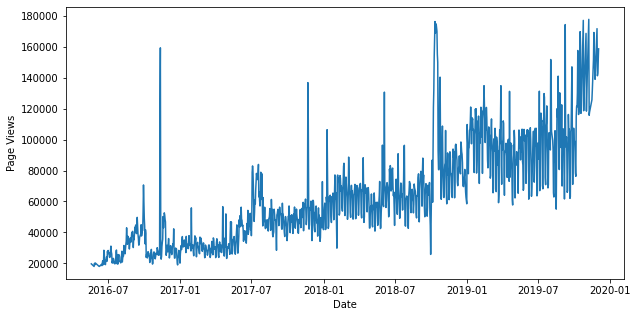

In [8]:
# Draw line plot
    
fig, ax = plt.subplots(figsize=(10, 5))
   
plt.plot(df.index,df["value"])
plt.ylabel("Page Views")
plt.xlabel("Date")



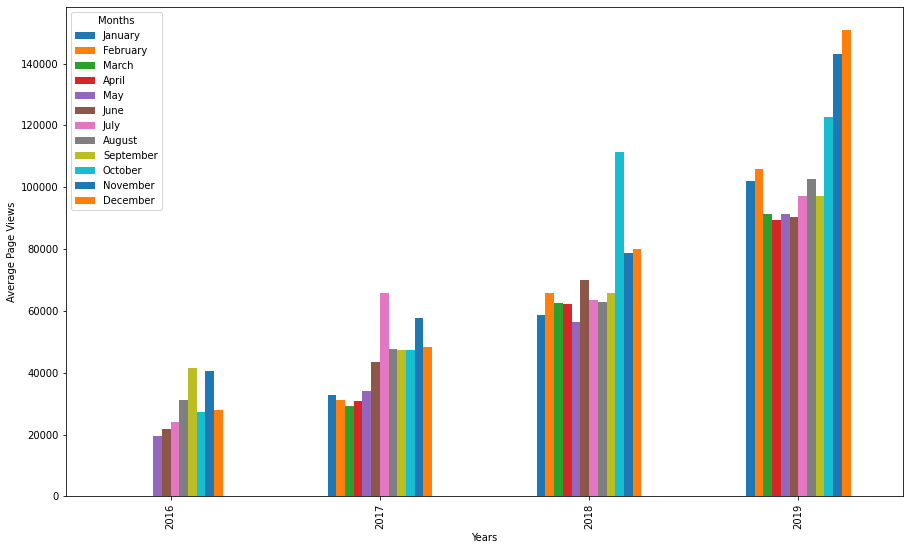

In [9]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()

# Draw bar plot

df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month

  
df_bar = df_bar.groupby(["year", "month"]).mean()
df_bar = df_bar.unstack()

fig = df_bar.plot.bar(xlabel="Years", ylabel="Average Page Views", figsize=(15, 9)).figure
plt.legend(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], title="Months")

[Text(0, 0.5, 'Page Views'), Text(0.5, 0, 'Month')]

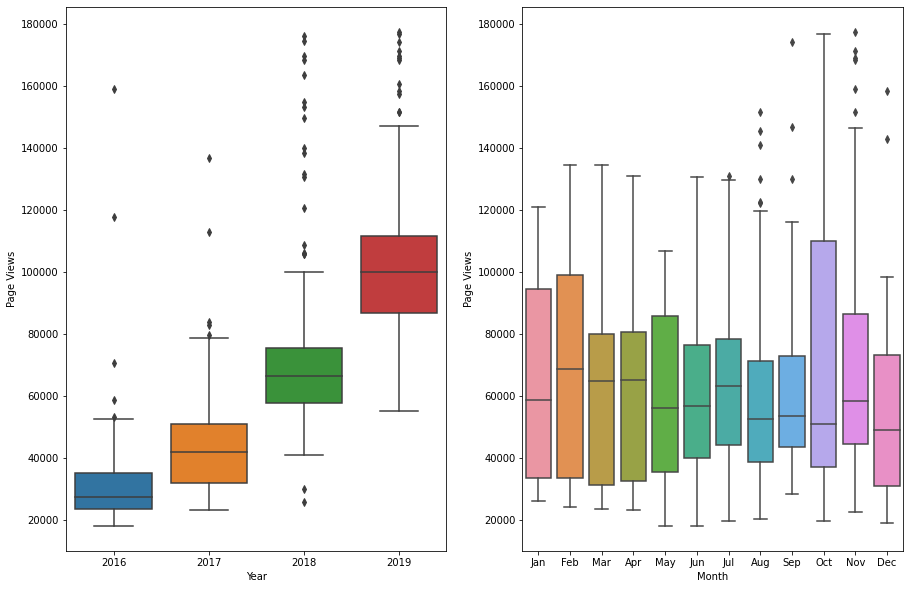

In [13]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)

fig,axis = plt.subplots(1,2,figsize=(15,10))
sns.boxplot (x = df_box["year"], y = df_box["value"], ax = axis[0]).set(xlabel="Year", ylabel="Page Views")
sns.boxplot(x=df_box["month"], y=df_box["value"],
          order=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
          ax = axis[1]).set(xlabel="Month", ylabel= "Page Views")

